By the end of this chapter, you will be able to analyze datasets with high dimensions and deal with the challenges posed by these datasets. As well as applying different dimensionality reduction techniques to large datasets, you will fit models based on those datasets and analyze their results.

when the number of variables you have to deal with is large, say around 18 million instead of the 18 you dealt with in the last chapter? How do you load such large datasets and analyze them? How do you deal with the computing resources required for modeling with such large datasets?

Healthcare, where genetics datasets can have millions of features
High-resolution imaging datasets
Web data related to advertisements, ranking, and crawling

When dealing with such huge datasets, many challenges can arise:

Storage and computation challenges: Large datasets with high dimensions require a lot of storage and expensive computational resources for analysis.

Exploration challenges: When trying to explore data and derive insights, high-dimensional data can be really cumbersome.

Algorithm challenges: Many algorithms do not scale well in high-dimensional settings.

Dimensionality reduction aims to reduce the dimensions of datasets to get over the challenges posed by high-dimensional data. In this chapter, we will examine some of the popular dimensionality reduction techniques:

Backward feature elimination or recursive feature elimination
Forward feature selection
Principal Component Analysis (PCA)
Independent Component Analysis (ICA)
Factor analysis

**Let's first examine our business context and then apply these techniques to the problem statement.**

***Business Context***

The marketing head of your company comes to you with a problem he has been grappling with. Many customers have been complaining about the browsing experience of your company's website because of the number of advertisements that pop up during browsing. Your company wants to build an engine on your web server that identifies potential advertisements and then eliminates them even before they pop up.

To help you to achieve this, you have been given a dataset that contains a set of possible advertisements on a variety of web pages. The features of the dataset represent the geometry of the images in the possible adverts, as well as phrases occurring in the URL, image URLs, anchor text, and words occurring near the anchor text. This dataset has also been labeled, with each possible ad given a label that says whether it is actually an advertisement or not. **Using this dataset, you have to build a model that predicts whether something is an advertisement or not.** You may think that this is a relatively simple problem that could be solved with any binary classification algorithm. However, there is a challenge in the dataset. **The dataset has a large number of features. You have set out to solve this high-dimensional dataset challenge.**

In [0]:
import pandas as pd

In [0]:
# Defining file name of the GitHub repository
filename = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter14/Dataset/ad.data'

In [12]:
adData = pd.read_csv(filename,sep=",",header = None,error_bad_lines=False)
adData.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.


In [13]:
# Printing the shape of the data
print(adData.shape)

(3279, 1559)


From the shape, we can see that we have a large number of features, 1559.

Find the summary of the numerical features of the raw data using the .describe() function in pandas, as shown in the following code snippet:

In [14]:
# Summarizing the statistics of the numerical raw data
adData.describe()

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,0.004880,0.003965,0.005489,0.003660,0.004880,0.003660,0.003050,0.004575,0.004575,0.004270,0.003660,0.003660,0.003660,0.006099,0.003355,0.004270,0.003660,0.003660,0.011894,0.009149,0.017078,0.005185,0.003050,0.003355,0.004575,0.009759,0.003355,0.004270,0.008539,0.005794,...,0.018298,0.004880,0.005489,0.004575,0.016773,0.004880,0.005794,0.005794,0.010674,0.011894,0.003050,0.014639,0.004270,0.005794,0.027447,0.010979,0.003355,0.005185,0.005185,0.015249,0.007014,0.007319,0.003050,0.012504,0.016163,0.003660,0.005185,0.003050,0.005489,0.009759,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,0.069694,0.062850,0.073899,0.060393,0.069694,0.060393,0.055148,0.067491,0.067491,0.065212,0.060393,0.060393,0.060393,0.077872,0.057831,0.065212,0.060393,0.060393,0.108425,0.095227,0.129583,0.071828,0.055148,0.057831,0.067491,0.098320,0.057831,0.065212,0.092026,0.075912,...,0.134048,0.069694,0.073899,0.067491,0.128441,0.069694,0.075912,0.075912,0.102778,0.108425,0.055148,0.120120,0.065212,0.075912,0.163408,0.104220,0.057831,0.071828,0.071828,0.122559,0.083470,0.085252,0.055148,0.111136,0.126123,0.060393,0.071828,0.055148,0.073899,0.098320,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Separate the dependent and independent variables from our dataset, as shown in the following code snippet:

In [15]:
# Separate the dependent and independent variables
# Preparing the X variables
X = adData.loc[:,0:1557]
print(X.shape)
# Preparing the Y variable
Y = adData[1558]
print(Y.shape)

(3279, 1558)
(3279,)


Print the first 15 examples of the independent variables

In [16]:
# Printing the head of the independent variables
X.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,125,125,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,59,460,7.7966,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,60,234,3.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


From the output, we can see that there are many missing values in the dataset, which are represented by ?. For further analysis, we have to remove these special characters and then replace those cells with assumed values. One popular method of replacing special characters is to impute the mean of the respective feature. Let's adopt this strategy. However, before doing that, let's look at the data types for this dataset to adopt a suitable replacement strategy.

In [20]:
# Printing the data types
print(X.dtypes)

0       object
1       object
2       object
3       object
4        int64
         ...  
1553     int64
1554     int64
1555     int64
1556     int64
1557     int64
Length: 1558, dtype: object


From the output, we can see that the first four columns are of the object type, which refers to string data, and the others are integer data. When replacing the special characters in the data, we need to be cognizant of the data types.

" Replacing special characters with NaN values makes it easy to further impute data.

To replace the first three columns, we loop through the columns using the for() loop and also using the range() function. Since the first three columns are of the object or string type, we use the .str.replace() function, which stands for "string replace". After replacing the special characters, ?, of the data with nan, we convert the data type to float with the .values.astype(float) function, which is required for further processing. By printing the first 15 examples, we can see that all special characters have been replaced with nan or NaN values

In [22]:
# Replacing special characters in first 3 columns which are of type object
for i in range(0,3):
      X[i] = X[i].str.replace("?", 'nan').values.astype(float)
print(X.head(15))

     0      1       2    3     4     5     ...  1552  1553  1554  1555  1556  1557
0   125.0  125.0  1.0000    1     0     0  ...     0     0     0     0     0     0
1    57.0  468.0  8.2105    1     0     0  ...     0     0     0     0     0     0
2    33.0  230.0  6.9696    1     0     0  ...     0     0     0     0     0     0
3    60.0  468.0  7.8000    1     0     0  ...     0     0     0     0     0     0
4    60.0  468.0  7.8000    1     0     0  ...     0     0     0     0     0     0
5    60.0  468.0  7.8000    1     0     0  ...     0     0     0     0     0     0
6    59.0  460.0  7.7966    1     0     0  ...     0     0     0     0     0     0
7    60.0  234.0  3.9000    1     0     0  ...     0     0     0     0     0     0
8    60.0  468.0  7.8000    1     0     0  ...     0     0     0     0     0     0
9    60.0  468.0  7.8000    1     0     0  ...     0     0     0     0     0     0
10    NaN    NaN     NaN    1     0     0  ...     0     0     0     0     0     0
11  

o replace the first three columns, we loop through the columns using the for() loop and also using the range() function. Since the first three columns are of the object or string type, we use the .str.replace() function, which stands for "string replace". After replacing the special characters, ?, of the data with nan, we convert the data type to float with the .values.astype(float) function, which is required for further processing. By printing the first 15 examples, we can see that all special characters have been replaced with nan or NaN values


Now, replace special characters for the integer features

In [0]:
# Replacing special characters in the remaining columns which are of type integer
for i in range(3,1557):
  X[i] = X[i].replace("?", 'NaN').values.astype(float)

Now that we have replaced special characters in the data with NaN values, we can use the fillna() function in pandas to replace the NaN values with the mean of the column. This is executed using the following code snippet:

In [24]:
import numpy as np

# Impute the 'NaN' with mean of the values
for i in range(0,1557):
  X[i] = X[i].fillna(X[i].mean())
print(X.head(15))

          0           1         2     3     4     ...  1553  1554  1555  1556  1557
0   125.000000  125.000000  1.000000   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
1    57.000000  468.000000  8.210500   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
2    33.000000  230.000000  6.969600   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
3    60.000000  468.000000  7.800000   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
4    60.000000  468.000000  7.800000   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
5    60.000000  468.000000  7.800000   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
6    59.000000  460.000000  7.796600   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
7    60.000000  234.000000  3.900000   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
8    60.000000  468.000000  7.800000   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
9    60.000000  468.000000  7.800000   1.0   0.0  ...   0.0   0.0   0.0   0.0     0
10   64.021886  155.344828  3.911953   1.0   0.0  ...   0.0   0.0   0.0   0.

Scale the dataset using the minmaxScaler() function

In [25]:
# Scaling the data sets
# Import library function
from sklearn import preprocessing

# Creating the scaling function
minmaxScaler = preprocessing.MinMaxScaler()

# Transforming with the scaler function
X_tran = pd.DataFrame(minmaxScaler.fit_transform(X))

# Printing the output
X_tran.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,0.194053,0.194053,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.087637,0.730829,0.136820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050078,0.358372,0.116138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


You have come to the end of the first exercise. In this exercise, we loaded the dataset, extracted summary statistics, cleaned the data, and also scaled the data. You can see that in the final output, all the raw values have been transformed into scaled values.

. In order to demonstrate the challenges with high-dimensional datasets, let's create an extremely high dimensional dataset from the internet dataset that we already have.

This we will achieve by replicating the existing number of features multiple times so that the dataset becomes really large. To replicate the dataset, we will use a function called np.tile(), which copies a data frame multiple times across the axes we want. We will also calculate the time it takes for any activity using the time() function.

In [0]:
import pandas as pd
import numpy as np

Then, to create a dummy data frame, we will use a small dataset with two rows and three columns for this example. We use the pd.np.array() function to create a data frame:

In [28]:
# Creating a simple data frame
df = pd.np.array([[1, 2, 3], [4, 5, 6]])
print(df.shape)
df

(2, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


array([[1, 2, 3],
       [4, 5, 6]])

Next, you replicate the dummy data frame and this replication of the columns is done using the pd.np.tile() function in the following code snippet:

In [29]:
# # Replicating the data frame and noting the time
import time
# Starting a timing function
t0=time.time()
Newdf = pd.DataFrame(pd.np.tile(df, (1, 5)))
print(Newdf.shape)
print(Newdf)
# Finding the end time 
print("Total time:", round(time.time()-t0, 3), "s")

(2, 15)
   0  1  2  3  4  5  6  7  8  9  10  11  12  13  14
0  1  2  3  1  2  3  1  2  3  1   2   3   1   2   3
1  4  5  6  4  5  6  4  5  6  4   5   6   4   5   6
Total time: 0.02 s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


As we can see in the snippet, the pd.np.tile() function accepts two sets of arguments. The first one is the data frame, df, that we want to replicate. The next argument, (1,5), defines which axes we want to replicate. In this example, we define that the rows will remain as is because of the 1 argument, and the columns will be replicated 5 times with the 5 argument. We can see from the shape() function that the original data frame, which was of shape (2,3), has been transformed into a data frame with a shape of (2,15).

Calculating the total time is done using the time library. To start the timing, we invoke the time.time() function. In the example, we store the initial time in a variable called t0 and then subtract this from the end time to find the total time it takes for the process. Thus we have augmented and added more data frames to our exiting internet ads dataset.

*Because of resource limitations we can not run some methods on colab, methods are a compute-intensive processes, and therefore this processes will take a lot of time to execute. The larger the number of features, the longer it will take. so we will only discuss steps as follows:*

**Backward Feature Elimination (Recursive Feature Elimination)**

The mechanism behind the backward feature elimination algorithm is the recursive elimination of features and building a model on those features that remain after all the elimination.

Let's look under the hood of this algorithm step by step

1.   Initially, at a given iteration, the selected classification algorithm is first trained on all the n features available. For example, let's take the case of the original dataset we had, which had 1,558 features. The algorithm starts off with all the 1,558 features in the first iteration.
2.  In the next step, we remove one feature at a time and train a model with the remaining n-1 features. This process is repeated n times. For example, we first remove feature 1 and then fit a model using all the remaining 1,557 variables. In the next iteration, we use feature 1 and instead, we eliminate feature 2 and then fit the model. This process is repeated n times (1,558) times.
3.   For each of the models fitted, the performance of the model (using measures such as accuracy) is calculated.
4.   The feature whose replacement has resulted in the smallest change in performance is removed permanently and Step 2 is repeated with n-1 features.
5.   The process is then repeated with n-2 features and so on.
6.   The algorithm keeps on eliminating features until the threshold number of features we require is reached.


**Dimensionality Reduction Using Backward Feature Elimination**

We are now ready to fit the backward elimination method on the higher-dimensional dataset. We will also note the time it takes for backward elimination to work. This is implemented using the following code snippet:

**Principal Component Analysis (PCA)**

The basic idea behind PCA is to first identify correlations among different variables within the dataset. Once correlations are identified, the algorithm decides to eliminate the variables in such a way that the variability of the data is maintained. In other words, PCA aims to find uncorrelated sources of data.

Implementing PCA on raw variables results in transforming them into a completely new set of variables called principal components. Each of these components represents variability in data along an axes that are orthogonal to each other. This means that the first axis is fit in the direction where the maximum variability of data is present. After this, the second axis is selected in such a way that the axis is orthogonal (perpendicular) to the first selected axis and also covers the next highest variability.

Let's look at the idea of PCA with an example.

We will create a sample dataset with 2 variables and 100 random data points in each variable. Random data points are created using the rand() function. This is implemented in the following code:

In [34]:
import numpy as np
# Setting the seed for reproducibility
seed = np.random.RandomState(123)
# Generating an array of random numbers
X = seed.rand(100,2)
# Printing the shape of the dataset
X.shape

(100, 2)

(-0.04635361265714105,
 1.0325632864350172,
 -0.003996887112708299,
 1.0429468329457663)

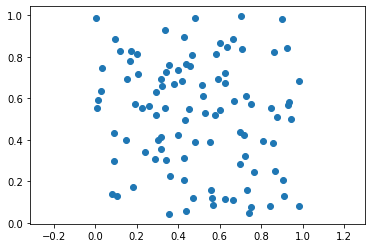

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In the graph, we can see that the data is evenly spread out.

Let's now find the principal components for this dataset. We will reduce this two-dimensional dataset into a one-dimensional dataset. In other words, we will reduce the original dataset into one of its principal components.

This is implemented in code as follows:

In [36]:
from sklearn.decomposition import PCA 

# Defining one component 
pca = PCA(n_components=1) 

# Fitting the PCA function 
pca.fit(X) 

# Getting the new dataset 
X_pca = pca.transform(X) 

# Printing the shapes 
print("Original data set: ", X.shape) 
print("Data set after transformation:", X_pca.shape)

Original data set:  (100, 2)
Data set after transformation: (100, 1)


The algorithm transforms the original dataset into its first principal component by using an axis where the data has the largest variability.

To visualize this concept, let's reverse the transformation of the X_pca dataset to its original form and then visualize this data along with the original data. To reverse the transformation, we use the .inverse_transform() function:

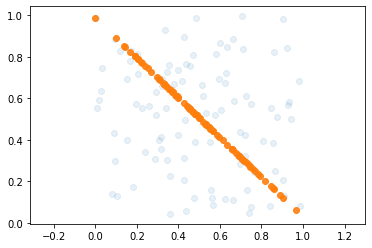

In [37]:
# Reversing the transformation and plotting
X_reverse = pca.inverse_transform(X_pca)

# Plotting the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.1)

# Plotting the reversed data
plt.scatter(X_reverse[:, 0], X_reverse[:, 1], alpha=0.9)
plt.axis('equal');

As we can see in the plot, the data points in orange represent an axis with the highest variability. All the data points were projected to that axis to generate the first principal component.

The data points that are generated when transforming into various principal components will be very different from the original data points before transformation. Each principal component will be in an axis that is orthogonal (perpendicular) to the other principal component. If a second principal component was generated for the preceding example, the second principal component would be along an axis indicated by the blue arrow in the graph. The way we pick the number of principal components for model building is by selecting the number of components that explains a certain threshold of variability.

For example, if there were originally 1,000 features and we reduced it to 100 principal components, and then we find that out of the 100 principal components the first 75 components explain 90% of the variability of data, we would pick those 75 components to build the model. This process is called picking principal components with the percentage of variance explained.


we will fit a logistic regression model by selecting the principal components that explain the maximum variability of the data. We will also observe the performance of the feature selection and model building process. We will be using the same ads dataset as before, and we will be enhancing it with additional features for this exercise. we are continuing with same data set which was exported.

In [38]:
# Creating a high dimension data set
X_hd = pd.DataFrame(pd.np.tile(X_tran, (1, 50)))
print(X_hd.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


(3279, 77900)


In [0]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_hd, Y, test_size=0.3, random_state=123)

Let's now fit the PCA function on the training set. This is done using the .fit() function, as shown in the following snippet. We will also note the time it takes to fit the PCA model on the dataset:

In [40]:
from sklearn.decomposition import PCA
import time
t0 = time.time()
pca = PCA().fit(X_train)
t1 = time.time()
print("PCA fitting time:", round(t1-t0, 3), "s")

PCA fitting time: 169.54 s


One can easily observe the 'RAM' uses exceed 9GB which is not possible to simulate results on normal laptops or systems, it require high end machines.

We will now determine the number of principal components by plotting the cumulative variance explained by all the principal components. The variance explained is determined by the pca.explained_variance_ratio_ method. This is plotted in matplotlib using the following code snippet:
In the code, the np.cumsum() function is used to get the cumulative variance of each principal component.

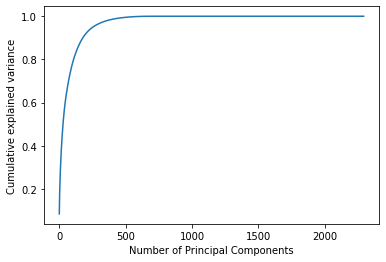

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');

From the plot, we can see that the first 250 principal components explain more than 90% of the variance. Based on this graph, we can decide how many principal components we want to have depending on the variability it explains. Let's select 250 components for fitting our model.

Now that we have identified that 250 components explain a lot of the variability, let's refit the training set for 250 components. This is described in the following code snippet:

In [67]:
# Defining PCA with 250 components
pca = PCA(n_components=250)

# Fitting PCA on the training set
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

We now transform the training and test sets with the 200 principal components

In [0]:
# Transforming training set and test set

X_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Let's verify the shapes of the train and test sets before transformation and after transformation:

In [70]:
# Printing the shape of train and test sets before and after transformation
print("original shape of Training set: ", X_train.shape)
print("original shape of Test set: ", X_test.shape)
print("Transformed shape of training set:", X_pca.shape)
print("Transformed shape of test set:", X_test_pca.shape)

original shape of Training set:  (2295, 77900)
original shape of Test set:  (984, 77900)
Transformed shape of training set: (2295, 250)
Transformed shape of test set: (984, 250)


Let's now fit the logistic regression model on the transformed dataset and note the time it takes to fit the model:

In [71]:
# Fitting a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
import time
pcaModel = LogisticRegression()
t0 = time.time()
pcaModel.fit(X_pca, y_train)
t1 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
print("Total training time:", round(t1-t0, 3), "s")

Total training time: 0.134 s


Now, predict on the test set and print the accuracy metrics

In [73]:
# Predicting with the pca model
pred = pcaModel.predict(X_test_pca)

print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(pcaModel.score(X_test_pca, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.98


You can see that the accuracy level is better than the benchmark model with all the features (97%) and the forward selection model (94%).

Print the confusion matrix

In [74]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[111  15]
 [  8 850]]


Print the classification report:

In [75]:
from sklearn.metrics import classification_report
# Getting the Classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.93      0.88      0.91       126
      nonad.       0.98      0.99      0.99       858

    accuracy                           0.98       984
   macro avg       0.96      0.94      0.95       984
weighted avg       0.98      0.98      0.98       984



As is evident from the results, we get a score of 98%, which is better than the benchmark model. One reason that could be attributed to the higher performance could be the creation of uncorrelated principal components using the PCA method, which has boosted the performance.

One can change the PCA parameters and check the model performance for different values.

**Independent Component Analysis (ICA)**

ICA is a technique of dimensionality reduction that conceptually follows a similar path as PCA. Both ICA and PCA try to derive new sources of data by linearly combining the original data.

However, the **difference between them** lies in the method they use to find new sources of data. While **PCA attempts to find uncorrelated sources of data, ICA attempts to find independent sources of data**.

n this exercise, we will fit a logistic regression model using the ICA technique and observe the performance of the model. We will be using the same ads dataset as before, and we will be enhancing it with additional features for this exercise.

In [76]:
# Creating a high dimension data set
X_hd = pd.DataFrame(pd.np.tile(X_tran, (1, 50)))
print(X_hd.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


(3279, 77900)


In [0]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_hd, Y, test_size=0.3, random_state=123)

Let's load the ICA function, FastICA, and then define the number of components we require. We will use the same number of components that we used for PCA:

In [0]:
# Defining the ICA with number of components
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=250, random_state=123)

Once the ICA method is defined, we will fit the method on the training set and also transform the training set to get a new training set with the required number of components. We will also note the time taken for fitting and transforming:

In [79]:
# Fitting the ICA method and transforming the training set
import time
t0 = time.time()
X_ica=ICA.fit_transform(X_train)
t1 = time.time()
print("ICA fitting time:", round(t1-t0, 3), "s")

ICA fitting time: 175.674 s


We can see that implementing ICA has taken much more time than PCA (179.54 seconds).

We now transform the test set with the 250 components:

In [0]:
# Transforming the test set
X_test_ica=ICA.transform(X_test)

Let's verify the shapes of the train and test sets before transformation and after transformation:

In [82]:
# Printing the shape of train and test sets before and after transformation
print("original shape of Training set: ", X_train.shape)
print("original shape of Test set: ", X_test.shape)
print("Transformed shape of training set:", X_ica.shape)
print("Transformed shape of test set:", X_test_ica.shape)

original shape of Training set:  (2295, 77900)
original shape of Test set:  (984, 77900)
Transformed shape of training set: (2295, 250)
Transformed shape of test set: (984, 250)


Let's now fit the logistic regression model on the transformed dataset and note the time it takes:

In [0]:
# Fitting a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
import time
icaModel = LogisticRegression()
t0 = time.time()
icaModel.fit(X_ica, y_train)
t1 = time.time()

Print the total time

In [84]:
print("Total training time:", round(t1-t0, 3), "s")

Total training time: 0.038 s


In [85]:
# Predicting with the ica model
pred = icaModel.predict(X_test_ica)

print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(icaModel.score(X_test_ica, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.87


In [86]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[  0 126]
 [  0 858]]


In [87]:
from sklearn.metrics import classification_report
# Getting the Classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       0.00      0.00      0.00       126
      nonad.       0.87      1.00      0.93       858

    accuracy                           0.87       984
   macro avg       0.44      0.50      0.47       984
weighted avg       0.76      0.87      0.81       984



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see, transforming the data to its first 250 independent components did not capture all the necessary variability in the data. This has resulted in the degradation of the classification results for this method. We can conclude that ICA is not suitable for this dataset.

It was also observed that the time taken to find the best independent features was longer than for PCA. However, it should be noted that different methods vary in results according to the input data. Even though ICA was not suitable for this dataset, it still is a potent method for dimensionality reduction that should be in the repertoire of a data scientist.

From this exercise, you may come up with a few questions:

How do you think we can improve the classification results using ICA?
Increasing the number of components results in a marginal increase in the accuracy metrics.
Are there any other side effects because of the strategy adopted to improve the results?
Increasing the number of components also results in a longer training time for the logistic regression model.

**Factor Analysis**

Factor analysis is a technique that achieves dimensionality reduction by grouping variables that are highly correlated.

In our dataset, there could be many features that describe the geometry (the size and shape of an image in the ad) of the images on a web page. These features can be correlated because they refer to specific characteristics of an image.

Similarly, there could be many features that describe the anchor text or phrases occurring in a URL, which are highly correlated. Factor analysis looks at correlated groups such as these from the data and then groups them into latent factors. Therefore, if there are 10 raw features describing the geometry of an image, factor analysis will group them into one feature that characterizes the geometry of an image. Each of these groups is called factors. As many correlated features are combined to form a group, the resulting number of features will be much smaller in comparison with the original dimensions of the dataset.

Let's now see how factor analysis can be implemented as a technique for dimensionality reduction.

In [88]:
# Creating a high dimension data set
X_hd = pd.DataFrame(pd.np.tile(X_tran, (1, 50)))

print(X_hd.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


(3279, 77900)


In [0]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_hd, Y, test_size=0.3, random_state=123)

In [0]:
# Defining the number of factors
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components = 20,random_state=123)

In [91]:
# Fitting the Factor analysis method and transforming the training set
import time
t0 = time.time()
X_fac=fa.fit_transform(X_train)
t1 = time.time()
print("Factor analysis fitting time:", round(t1-t0, 3), "s")

Factor analysis fitting time: 95.624 s


In [0]:
# Transforming the test set
X_test_fac=fa.transform(X_test)

In [94]:
# Printing the shape of train and test sets before and after transformation
print("original shape of Training set: ", X_train.shape)
print("original shape of Test set: ", X_test.shape)
print("Transformed shape of training set:", X_fac.shape)
print("Transformed shape of test set:", X_test_fac.shape)

original shape of Training set:  (2295, 77900)
original shape of Test set:  (984, 77900)
Transformed shape of training set: (2295, 20)
Transformed shape of test set: (984, 20)


You can see that both the training and test sets have been reduced to 20 factors each

In [0]:
# Fitting a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
import time
facModel = LogisticRegression()
t0 = time.time()
facModel.fit(X_fac, y_train)
t1 = time.time()

In [96]:
print("Total training time:", round(t1-t0, 3), "s")

Total training time: 0.027 s


In [97]:
# Predicting with the factor analysis model
pred = facModel.predict(X_test_fac)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(facModel.score(X_test_fac, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.92


In [98]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[ 48  78]
 [  0 858]]


In [99]:
from sklearn.metrics import classification_report
# Getting the Classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ad.       1.00      0.38      0.55       126
      nonad.       0.92      1.00      0.96       858

    accuracy                           0.92       984
   macro avg       0.96      0.69      0.75       984
weighted avg       0.93      0.92      0.90       984



As we can see in the results, by reducing the variables to just 20 factors, we were able to get a decent classification result. Even though there is degradation on the result, we still have a manageable number of features, which will be able to scale well on any algorithm. The balance between the accuracy measures and the ability to manage features needs to be explored through greater experimentation.

How do you think we can improve the classification results for factor analysis?

Well, increasing the number of components results in an increase in the accuracy metrics.

we can see that three methods (backward elimination, forward selection, and PCA) have got the same accuracy scores. Therefore, the selection criteria for the best method should be based on the time taken to get the reduced dimension. With these criteria, the forward selection method is the best method, followed by PCA.

For the third place, we should strike a balance between accuracy and the time taken for dimensionality reduction. We can see that factor analysis and backward elimination have very close accuracy scores, 96% and 97% respectively. However, the time taken for backward elimination is quite large compared to factor analysis. Therefore, we should weigh our considerations toward factor analysis as the third best, even though the accuracy is marginally lower than backward elimination. The last spot should go to ICA because the accuracy is far lower than all the other methods.